In [9]:
import pandas as pd
import re

# Read the CSV
df = pd.read_csv('tabular_data/covers_attributes.csv')

# Extract year from image filename
def extract_year(filename):
    m = re.search(r'cover_(\d{4})_\d{2}_\d{2}', filename)
    return int(m.group(1)) if m else None

df['year'] = df['image'].apply(extract_year)

# Create 5-year bins
def year_to_period(year):
    if pd.isnull(year):
        return None
    start = (year // 5) * 5
    end = start + 4
    return f"{start}-{end}"

df['period'] = df['year'].apply(year_to_period)

# Explode top_labels into individual labels
labels_df = df.dropna(subset=['top_labels']).copy()
labels_df['top_labels'] = labels_df['top_labels'].str.split('; ')
labels_df = labels_df.explode('top_labels')

# Count label frequency per period
label_counts = labels_df.groupby(['period', 'top_labels']).size().reset_index(name='count')

# Sort by period and count
label_counts = label_counts.sort_values(['period', 'count'], ascending=[True, False])

# Show the result
label_counts.head(10)  # Show top 10 rows as a sample

,period,top_labels,count
124,1935-1939,velvet,102
101,1935-1939,set,89
102,1935-1939,silk,80
96,1935-1939,sash,76
70,1935-1939,multicolor,69
15,1935-1939,blue,51
41,1935-1939,evening,45
28,1935-1939,coat,41
3,1935-1939,appliqué,36
129,1935-1939,wool,35


In [10]:
# Define the mapping from label to attribute type
attribute_type_map = {}

# Apparel Category
for label in [
    "t-shirt", "shirt", "blouse", "mini dress", "midi dress", "maxi dress", "pants", "trousers", "jeans", "shorts", "skirt", "jumpsuit", "romper", "sweater", "hoodie", "jacket", "blazer", "trench coat", "parka", "overcoat", "coat", "cardigan", "swimwear", "bikini", "one-piece", "loungewear", "sleepwear", "activewear", "sportswear", "suit", "set", "co-ord"
]:
    attribute_type_map[label] = "Apparel Category"

# Color
for label in [
    "red", "blue", "green", "yellow", "pink", "black", "white", "gray", "brown", "beige", "pastel", "neon", "earth tones", "gradient", "ombre", "multicolor", "color-blocked"
]:
    attribute_type_map[label] = "Color"

# Pattern
for label in [
    "solid", "horizontal stripes", "vertical stripes", "diagonal stripes", "striped", "checked", "plaid", "tartan", "floral", "polka dots", "animal print", "leopard print", "zebra print", "snake print", "camouflage", "abstract print", "geometric print", "tie-dye", "batik", "logo print", "text print"
]:
    attribute_type_map[label] = "Pattern"

# Silhouette / Fit
for label in [
    "a-line", "bodycon", "straight fit", "column fit", "flared", "wide-leg", "relaxed fit", "loose fit", "slim fit", "tailored fit", "boxy", "wrap style", "empire waist", "peplum"
]:
    attribute_type_map[label] = "Silhouette / Fit"

# Fabric / Material
for label in [
    "cotton", "denim", "wool", "cashmere", "silk", "satin", "chiffon", "lace", "velvet", "leather", "faux leather", "linen", "jersey", "ribbed", "knit", "sequin", "mesh", "tulle"
]:
    attribute_type_map[label] = "Fabric / Material"

# Design Details
for label in [
    "ruffles", "frills", "pleats", "embroidery", "appliqué", "beading", "sequins", "cut-outs", "front slit", "side slit", "back slit", "asymmetric details", "belt", "tie", "sash", "buttons", "zippers", "snaps", "visible pockets", "flap pockets", "patch pockets"
]:
    attribute_type_map[label] = "Design Details"

# Sleeve Type
for label in [
    "sleeveless", "cap sleeves", "short sleeves", "elbow-length sleeves", "long sleeves", "puff sleeves", "bell sleeves", "bishop sleeves", "raglan sleeves", "off-shoulder", "cold-shoulder"
]:
    attribute_type_map[label] = "Sleeve Type"

# Neckline Type
for label in [
    "round neck", "crew neck", "v-neck", "square neck", "boat neck", "scoop neck", "turtleneck", "mock neck", "halter neck", "cowl neck", "sweetheart neckline", "plunge neckline", "collared"
]:
    attribute_type_map[label] = "Neckline Type"

# Length / Hemline
for label in [
    "cropped", "waist-length", "hip-length", "knee-length", "midi length", "maxi length", "high-low hem", "asymmetric hem", "scalloped hem"
]:
    attribute_type_map[label] = "Length / Hemline"

# Occasion / Style
for label in [
    "casual", "formal", "business", "workwear", "evening", "party", "streetwear", "resort", "beachwear", "sporty", "lounge", "sleep", "bridal", "occasion", "outerwear", "layering"
]:
    attribute_type_map[label] = "Occasion / Style"

# Map the attribute type to each label in your exploded DataFrame
label_counts['attribute_type'] = label_counts['top_labels'].map(attribute_type_map).fillna("Other")

# Now you can group, analyze, or visualize by attribute_type as well!
label_counts.head(10)

,period,top_labels,count,attribute_type
124,1935-1939,velvet,102,Fabric / Material
101,1935-1939,set,89,Apparel Category
102,1935-1939,silk,80,Fabric / Material
96,1935-1939,sash,76,Design Details
70,1935-1939,multicolor,69,Color
15,1935-1939,blue,51,Color
41,1935-1939,evening,45,Occasion / Style
28,1935-1939,coat,41,Apparel Category
3,1935-1939,appliqué,36,Design Details
129,1935-1939,wool,35,Fabric / Material


In [12]:
# 1. Sort so the highest count is first within each group
label_counts_with_type = label_counts.sort_values(['period', 'attribute_type', 'count'], ascending=[True, True, False])

# 2. Drop duplicates to keep only the top label for each period and attribute_type
top_labels = label_counts_with_type.drop_duplicates(subset=['period', 'attribute_type'], keep='first')

# 3. Pivot: index=period, columns=attribute_type, values=top_labels
pivot = top_labels.pivot(index='period', columns='attribute_type', values='top_labels')

# Display the pivot table
display(pivot)

attribute_type,Apparel Category,Color,Design Details,Fabric / Material,Length / Hemline,Neckline Type,Occasion / Style,Pattern,Silhouette / Fit,Sleeve Type
period,,,,,,,,,,
1935-1939,set,multicolor,sash,velvet,scalloped hem,boat neck,evening,floral,peplum,sleeveless
1940-1944,set,multicolor,sash,velvet,waist-length,mock neck,evening,floral,empire waist,puff sleeves
1945-1949,set,blue,appliqué,velvet,waist-length,mock neck,lounge,floral,wide-leg,elbow-length sleeves
1950-1954,set,multicolor,sash,velvet,waist-length,mock neck,evening,floral,peplum,cap sleeves
1955-1959,set,multicolor,appliqué,velvet,waist-length,mock neck,evening,floral,wide-leg,cap sleeves
1960-1964,set,multicolor,appliqué,velvet,waist-length,mock neck,evening,polka dots,peplum,cap sleeves
1965-1969,set,neon,sash,velvet,asymmetric hem,mock neck,lounge,floral,boxy,elbow-length sleeves
1970-1974,set,neon,sash,velvet,waist-length,mock neck,lounge,tartan,boxy,elbow-length sleeves
1975-1979,set,neon,sash,velvet,waist-length,mock neck,evening,tartan,boxy,elbow-length sleeves


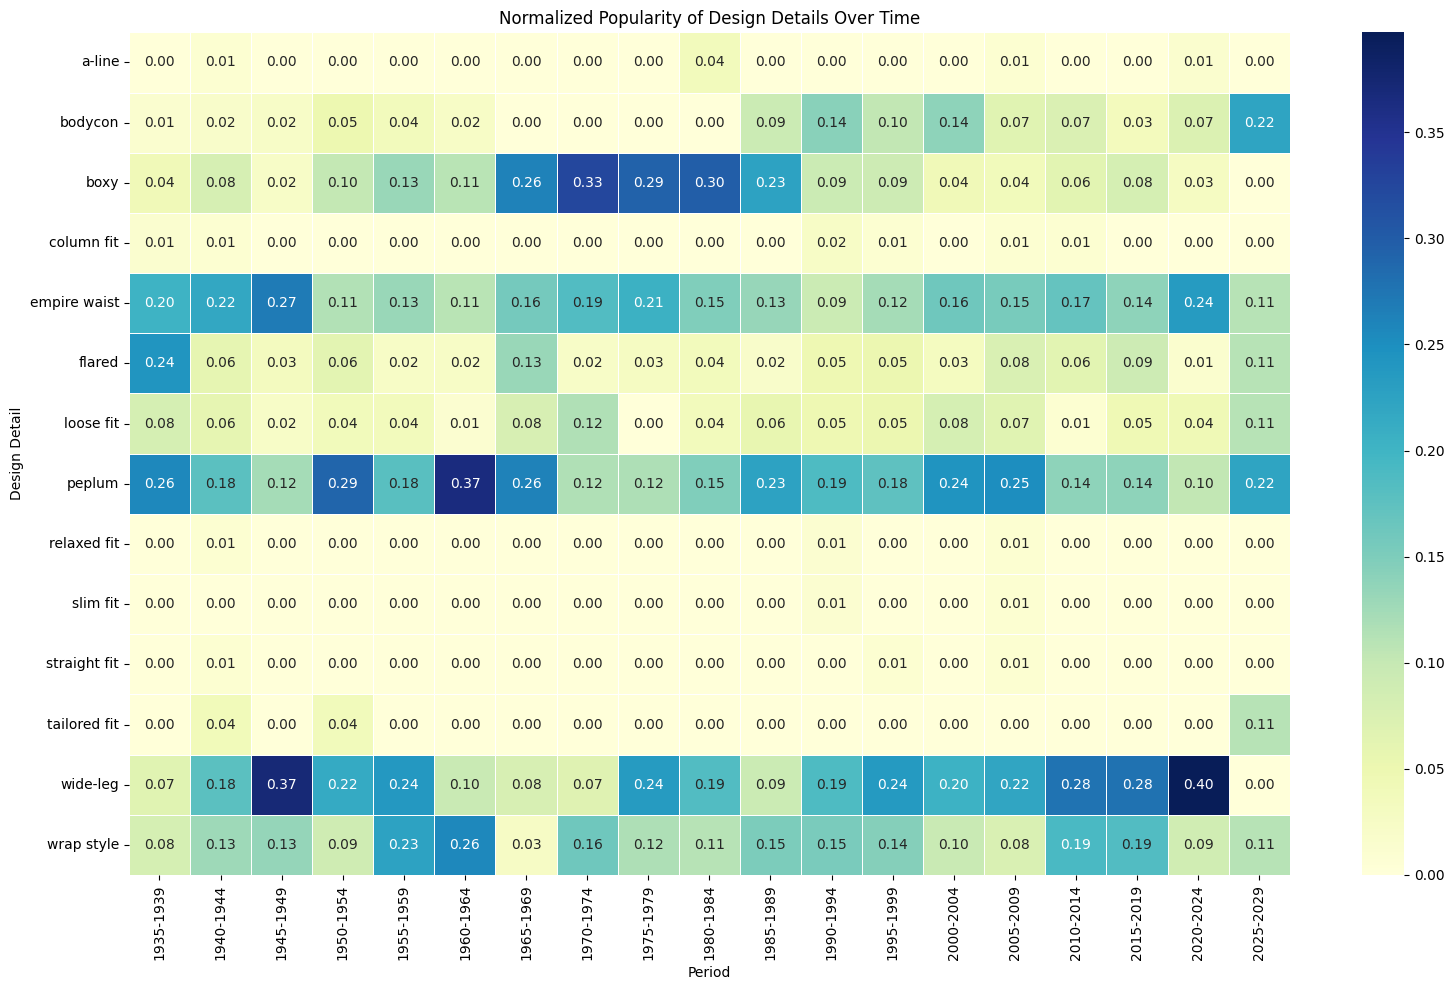

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# (Assuming design_details_df is already filtered and normalized as in your code)

# Pivot the DataFrame for heatmap: rows=top_labels, columns=period, values=normalized_count
heatmap_data = design_details_df.pivot(index='top_labels', columns='period', values='normalized_count').fillna(0)

plt.figure(figsize=(16, 10))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    linewidths=0.5,
    annot=True,  # Set to False if you don't want numbers in the cells
    fmt=".2f"
)

plt.title('Normalized Popularity of Design Details Over Time')
plt.xlabel('Period')
plt.ylabel('Design Detail')
plt.tight_layout()
plt.show()

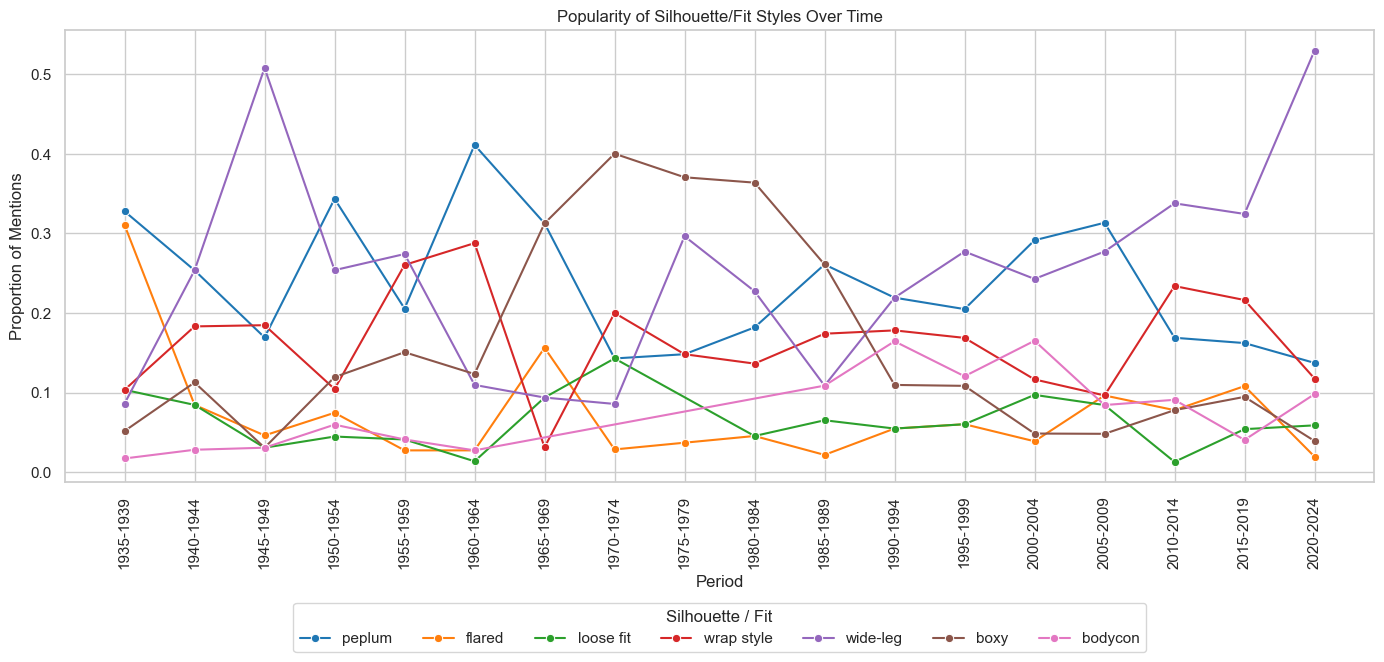

In [45]:
# Your selected categories
selected_labels = ["bodycon", "boxy", "peplum", "wide-leg", "wrap style", "loose fit", "flared"]

# Filter for Silhouette / Fit, selected labels, and periods up to 2024
filtered_df = label_counts[
    (label_counts['attribute_type'] == 'Silhouette / Fit') &
    (label_counts['top_labels'].isin(selected_labels)) &
    (label_counts['period'].apply(lambda x: int(x.split('-')[1]) <= 2024))
].copy()

# Normalize counts within each period
period_totals = filtered_df.groupby('period')['count'].transform('sum')
filtered_df['normalized_count'] = filtered_df['count'] / period_totals

# Use a highly distinct color palette
distinct_colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange  
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
]

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=filtered_df,
    x='period',
    y='normalized_count',
    hue='top_labels',
    marker='o',
    palette=distinct_colors
)

plt.title('Popularity of Silhouette/Fit Styles Over Time')
plt.xlabel('Period')
plt.ylabel('Proportion of Mentions')
plt.legend(title='Silhouette / Fit', loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=7)
plt.xticks(rotation=90)
plt.tight_layout()

# Save the plot
plt.savefig('visualizations/fit_popularity_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

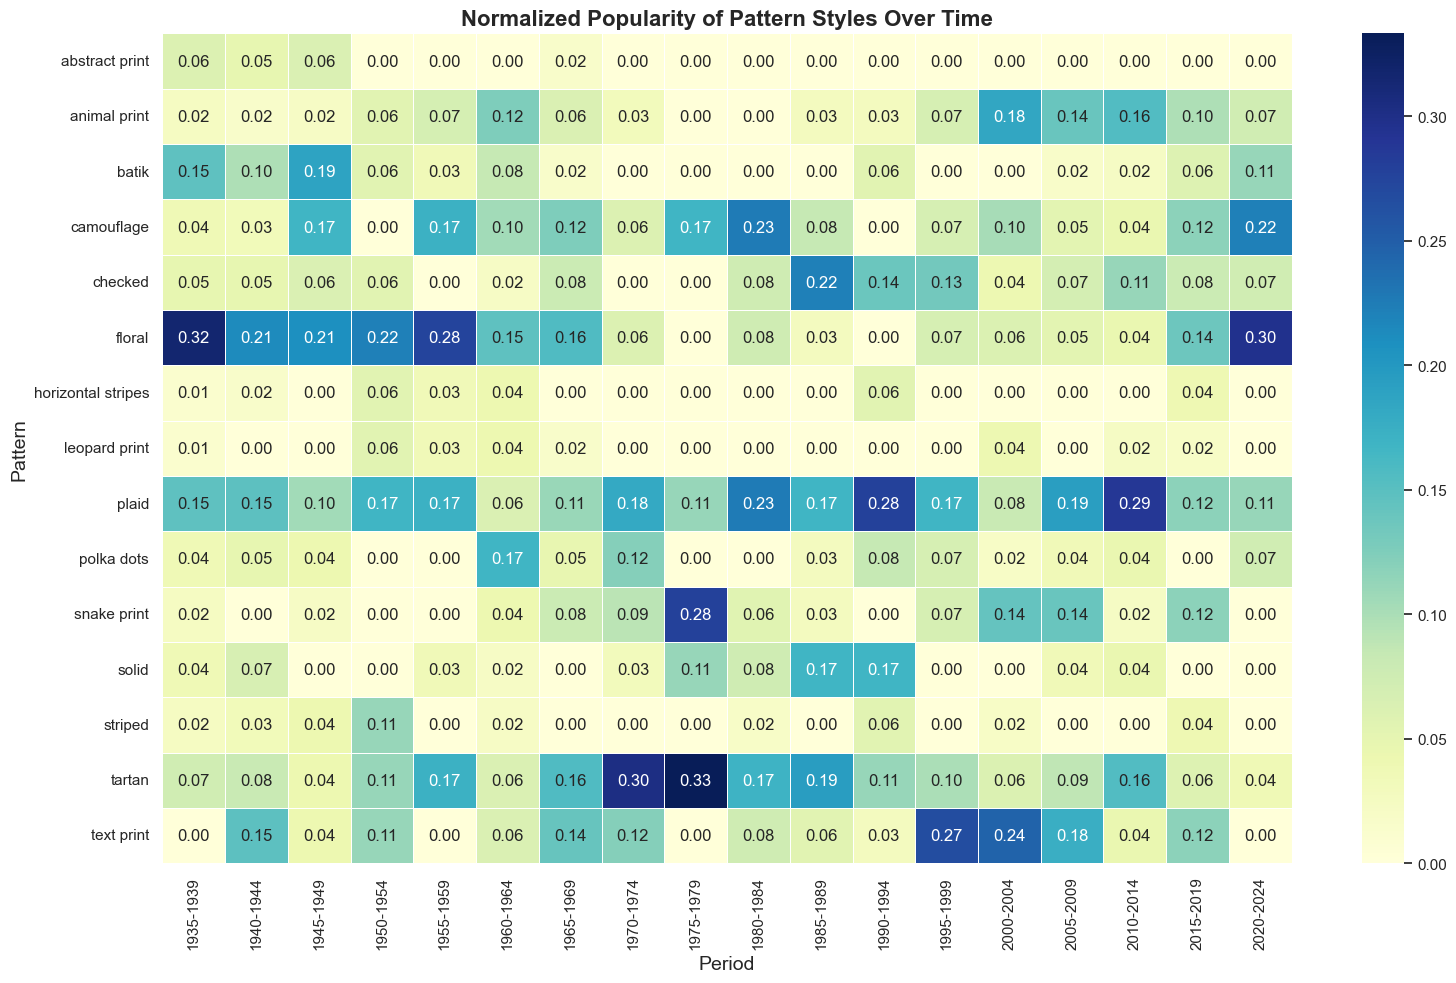

In [44]:
# Filter for Pattern attribute type
pattern_df = label_counts[
    (label_counts['attribute_type'] == 'Pattern') &
    (label_counts['period'].apply(lambda x: int(x.split('-')[1]) <= 2024))
].copy()

# Get top patterns by total count across all periods
top_patterns = pattern_df.groupby('top_labels')['count'].sum().sort_values(ascending=False).head(15).index.tolist()

# Filter for top patterns only
pattern_df = pattern_df[pattern_df['top_labels'].isin(top_patterns)]

# Normalize counts within each period
period_totals = pattern_df.groupby('period')['count'].transform('sum')
pattern_df['normalized_count'] = pattern_df['count'] / period_totals

# Pivot the DataFrame for heatmap: rows=top_labels, columns=period, values=normalized_count
heatmap_data = pattern_df.pivot(index='top_labels', columns='period', values='normalized_count').fillna(0)

plt.figure(figsize=(16, 10))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    linewidths=0.5,
    annot=True,
    fmt=".2f"
)

plt.title('Normalized Popularity of Pattern Styles Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Period', fontsize=14)
plt.ylabel('Pattern', fontsize=14)
plt.tight_layout()
plt.show()

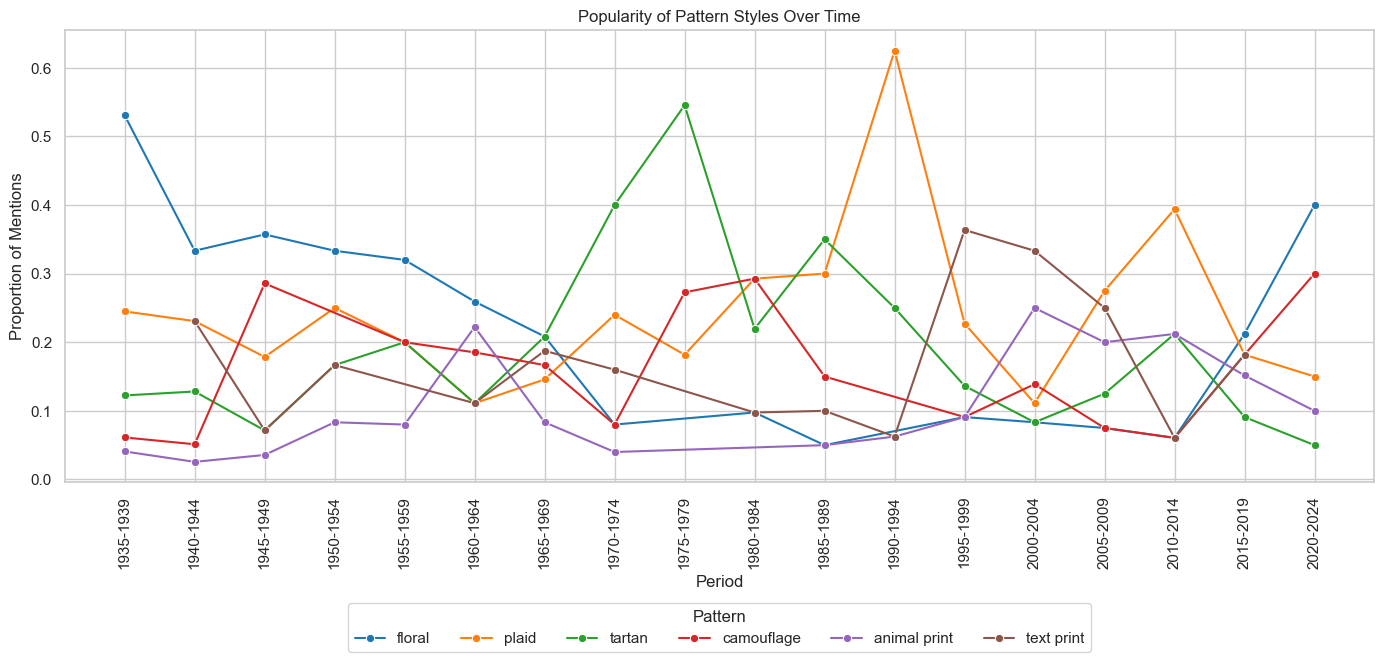

In [50]:
# Your selected pattern categories
selected_patterns = ["animal print", "floral", "plaid", "tartan", "text print", "camouflage"]

# Filter for Pattern attribute type, selected patterns, and periods up to 2024
filtered_df = label_counts[
    (label_counts['attribute_type'] == 'Pattern') &
    (label_counts['top_labels'].isin(selected_patterns)) &
    (label_counts['period'].apply(lambda x: int(x.split('-')[1]) <= 2024))
].copy()

# Normalize counts within each period
period_totals = filtered_df.groupby('period')['count'].transform('sum')
filtered_df['normalized_count'] = filtered_df['count'] / period_totals

# Use a highly distinct color palette
distinct_colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange  
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
]

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=filtered_df,
    x='period',
    y='normalized_count',
    hue='top_labels',
    marker='o',
    palette=distinct_colors
)

plt.title('Popularity of Pattern Styles Over Time')
plt.xlabel('Period')
plt.ylabel('Proportion of Mentions')
plt.legend(title='Pattern', loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=6)
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('visualizations/pattern_popularity_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# For Trend Forecasting:
# High autocorrelation + strong seasonal: Predictable cycles
# Low autocorrelation + weak seasonal: Unpredictable trends
# Cross-correlation patterns: Use one trend to predict related trends
# For Fashion Cycles:
# Peak detection: Identify when trends will peak/revive
# Cycle length: Plan product development timelines
# Cycle regularity: Assess forecasting reliability
# For Business Strategy:
# Strong cyclical patterns: Invest in trend revival strategies
# Weak cyclical patterns: Focus on innovation and trend creation
# Cross-correlations: Develop complementary product lines
# For Fashion Theory:
# Long cycles (20+ years): Generational fashion theory
# Medium cycles (10-20 years): Economic cycle theory
# Short cycles (5-10 years): Fast fashion theory